### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy


In [3]:
#Establish Output Files
output_data_file = "VacationPy/output_data/cities.csv"

In [4]:
#Establish range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
weather_api_key = "b6e9115acce5932a15fb4e2d0b72455e"

## Generate Cities List

In [6]:
# List for holding Lat_Lags and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0],lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0],lat_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique then it to our city list
    
    if city not in cities:
        cities.append(city)

len(cities)

582

In [6]:
cities


['sechura',
 'kapaa',
 'souillac',
 'barrow',
 'wolfhagen',
 'dikson',
 'bilma',
 'faanui',
 'waverly',
 'narsaq',
 'kodiak',
 'cidreira',
 'kibre mengist',
 'bambous virieux',
 'coquimbo',
 'jamestown',
 'lukhovitsy',
 'villanueva de cordoba',
 'berlevag',
 'bemidji',
 'port alfred',
 'punta arenas',
 'rikitea',
 'barentsburg',
 'hithadhoo',
 'beloha',
 'jackson',
 'hermanus',
 'illoqqortoormiut',
 'kilinochchi',
 'fairbanks',
 'pangnirtung',
 'attawapiskat',
 'kuopio',
 'marcona',
 'sinazongwe',
 'castro',
 'aklavik',
 'tuktoyaktuk',
 'alofi',
 'pafos',
 'camacha',
 'qaanaaq',
 'dingle',
 'la ronge',
 'acapulco',
 'luderitz',
 'praia',
 'saravena',
 'inhambane',
 'provideniya',
 'bengkulu',
 'lamar',
 'hilo',
 'sinnamary',
 'maragogi',
 'mar del plata',
 'grass valley',
 'brae',
 'cabo san lucas',
 'malakal',
 'tabou',
 'east london',
 'ushuaia',
 'ribeira grande',
 'chuy',
 'moundou',
 'tasiilaq',
 'chateaubelair',
 'kruisfontein',
 'saint-philippe',
 'bredasdorp',
 'trelew',
 'kast

## Perform API Calls

In [7]:
# Starting URL for weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6e9115acce5932a15fb4e2d0b72455e"

In [8]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6e9115acce5932a15fb4e2d0b72455e'

In [9]:
city_data = []

#Print 
print("beginning data retrieval")
print("------------------------------")


#Create Counter
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if(i % 50 == 0and i >= 50):
        set_count +- 1
        record_count = 0

#create endpoint URL with each city
    city_url = url + "&q=" + city

#log the ur, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#Add 1 to the record count
    record_count += 1

#run an API request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
    #parse the max temp, humidity, and cloudiness

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
    
    #Adding the City info to the list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    
#If problem, go to the next city    
    except:
        print("City not found. Skipping....")
    pass

#Reflect the processing of the data load
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | kanigiri
Processing Record 14 of Set 1 | shubarshi
Processing Record 15 of Set 1 | utete
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | khandbari
Processing Record 18 of Set 1 | yomou
Processing Record 19 of Set 1 | shemonaikha
Processing Record 20 of Set 1 | huarmey
Processing Record 21 of Set 1 | matrei
City not found. Skipping....
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | loukhi
Processing Record 24 of Set 1 | yar-sale
Processing Record 25 of Set 1 | atuona
Processing Record 26 of Set 1 | pisco
Processing Record 27 of Set 1 | karkaralinsk
City not found. Skipping....
Processing Record 28 of Set 1 | praxedis guerrero
Processing Record 29 of Set 1 | klaksvik
Processing Record 30 of Set 1 | vondrozo
Processing Record 31 of Set 1 | hambantota
Processing Record 32 of Set 1 | taoudenni
Processing Record 33 of Set 1 | grand 

In [11]:
city_data

ed': 3.09,
  'Country': 'US',
  'Date': 1609461430},
 {'City': 'roald',
  'Lat': 62.58,
  'Lng': 6.13,
  'Max Temp': 33.8,
  'Humidity': 80,
  'Cloudiness': 79,
  'Wind Speed': 5.82,
  'Country': 'NO',
  'Date': 1609461430},
 {'City': 'lapy',
  'Lat': 52.99,
  'Lng': 22.88,
  'Max Temp': 35.01,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 5.46,
  'Country': 'PL',
  'Date': 1609461430},
 {'City': 'boljevac',
  'Lat': 43.83,
  'Lng': 21.95,
  'Max Temp': 39,
  'Humidity': 6,
  'Cloudiness': 1,
  'Wind Speed': 2.82,
  'Country': 'RS',
  'Date': 1609461431},
 {'City': 'springbok',
  'Lat': -29.66,
  'Lng': 17.89,
  'Max Temp': 48.04,
  'Humidity': 77,
  'Cloudiness': 0,
  'Wind Speed': 3.83,
  'Country': 'ZA',
  'Date': 1609461431},
 {'City': 'pietersburg',
  'Lat': -23.9,
  'Lng': 29.47,
  'Max Temp': 71.6,
  'Humidity': 78,
  'Cloudiness': 1,
  'Wind Speed': 8.05,
  'Country': 'ZA',
  'Date': 1609461431},
 {'City': 'portree',
  'Lat': 57.41,
  'Lng': -6.19,
  'Max Temp': 39.99,

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sechura,-5.56,-80.82,76.50,51,5,14.81,PE,1604513135
1,kapaa,22.08,-159.32,78.80,88,40,9.17,US,1604513135
2,souillac,-20.52,57.52,73.40,73,75,10.29,MU,1604513135
3,barrow,71.29,-156.79,26.60,58,20,26.40,US,1604512892
4,wolfhagen,51.33,9.17,42.80,81,20,6.93,DE,1604512945
...,...,...,...,...,...,...,...,...,...
494,nuuk,64.18,-51.72,28.40,100,90,25.28,GL,1604513193
495,mweka,-4.85,21.57,72.01,96,77,2.26,CD,1604513193
496,comodoro rivadavia,-45.87,-67.50,73.40,23,75,21.92,AR,1604513194
497,karachi,24.91,67.08,75.20,73,0,9.17,PK,1604513016


In [12]:
#city_data_df.describe()

NameError: name 'city_data_df' is not defined

# ScatterPlot latitude (x) vs. temperature (y)
### ScatterPlot with linear regression and R-value



In [13]:
#export csv file
output_data_file = 'output_data_file/cities.csv'
city_data_df.to_csv(output_data_file, index_label = 'city_id') 

NameError: name 'city_data_df' is not defined

#### Analysis of the relationship between latitude and max temperature:  This illustrates that as you move away from the equator that the temperature is lower.   Near the equator, the temperature is higher.

# ScatterPlot latitude (x) vs. Humidity (y)
### ScatterPlot with linear regression and R-value

The r-squared is: 0.047836203785962844


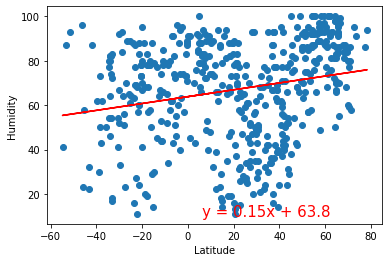

In [24]:
#Y value is Humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()




#Latitude vs. Windspeed
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [14]:
#Latitude vs. Windspeed
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'x_values' is not defined

# ScatterPlot latitude (x) vs. Cloudiness (y)
### ScatterPlot with linear regression and R-value


The r-squared is: 0.0016088012222460477


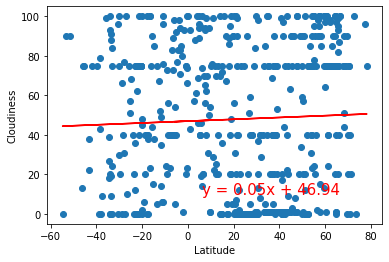

In [25]:
#Y value is Cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# ScatterPlot latitude (x) vs. Wind Speed (y)
### ScatterPlot with linear regression and R-value

The r-squared is: 0.0029618853098731576


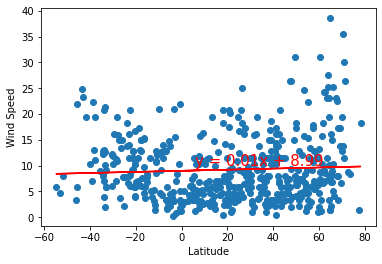

In [26]:
#Y value is Wind Speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [38]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sechura,-5.56,-80.82,76.5,51,5,14.81,PE,1604513135
1,kapaa,22.08,-159.32,78.8,88,40,9.17,US,1604513135
2,souillac,-20.52,57.52,73.4,73,75,10.29,MU,1604513135
3,barrow,71.29,-156.79,26.6,58,20,26.40,US,1604512892
4,wolfhagen,51.33,9.17,42.8,81,20,6.93,DE,1604512945


## Northern Hemisphere

In [ ]:
#Identify northern hemisphere in dataframes

northern_df = city_data_df.loc[(city_data_df["Lat"] > 0)]
northern_df

In [52]:
#Changing the x and y values

x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

The r-squared is: 0.08419140738381097


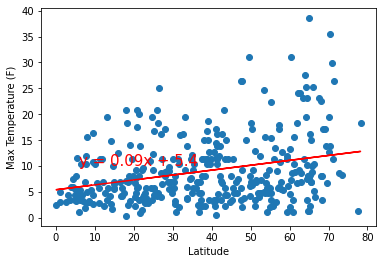

In [53]:
#Latitude vs. Max Temperature

#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.08419140738381097


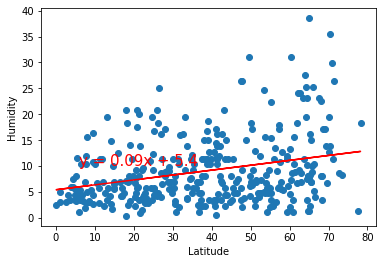

In [54]:
#Latitude vs. Humidity
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()





The r-squared is: 0.08419140738381097


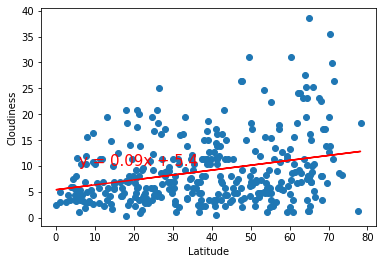

In [55]:
#Latitude vs. Cloudiness
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.08419140738381097


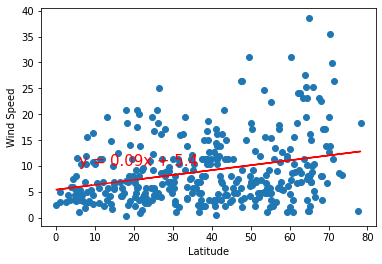

In [56]:
#Latitude vs. Windspeed
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Southern Hemisphere

In [44]:
#Identify southern hemisphere (to include the equator) in dataframes

southern_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sechura,-5.56,-80.82,76.50,51,5,14.81,PE,1604513135
2,souillac,-20.52,57.52,73.40,73,75,10.29,MU,1604513135
7,faanui,-16.48,-151.75,79.16,80,100,15.37,PF,1604513135
11,cidreira,-30.18,-50.21,64.92,52,30,11.83,BR,1604513136
13,bambous virieux,-20.34,57.76,73.40,73,75,10.29,MU,1604513136
...,...,...,...,...,...,...,...,...,...
476,tiarei,-17.53,-149.33,80.60,78,40,14.99,PF,1604513192
485,piet retief,-27.01,30.81,66.18,70,100,3.74,ZA,1604513192
490,santa isabel do rio negro,-0.41,-65.02,82.83,89,74,2.77,BR,1604513193
495,mweka,-4.85,21.57,72.01,96,77,2.26,CD,1604513193


In [57]:
#Changing the x and y values

x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

The r-squared is: 0.08236860971148854


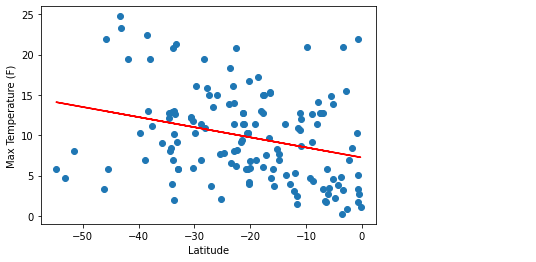

In [58]:
# Latitude vs. Max Temperature
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.08236860971148854


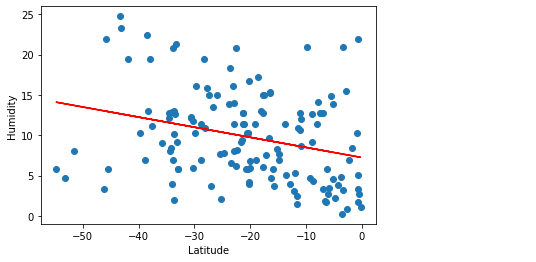

In [59]:
#Latitude vs. Humidity
#Standard linear regresssion template
#
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.08236860971148854


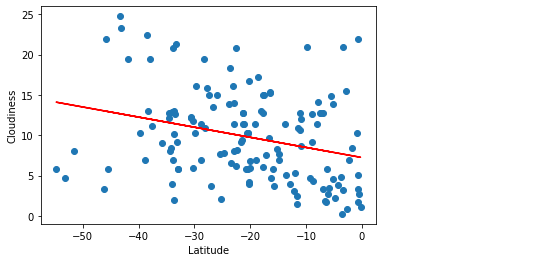

In [49]:
#Latitude vs. Cloudiness
#Standard linear regresssion template
#Cloudiness and latitude seemed to present an inverse relationship.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.08236860971148854


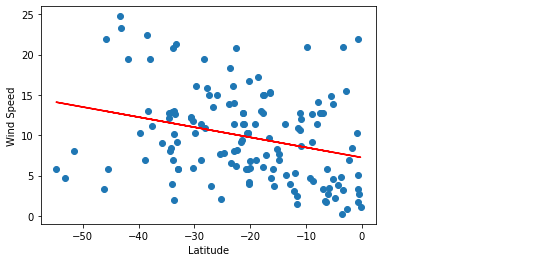

In [50]:
#Latitude vs. Windspeed
#Standard linear regresssion template
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


